In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [ ]:
# Read the City Data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

In [ ]:
# Read the Ride Data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

In [82]:
# Combine the data into a single dataset
# Display the data table for preview
mergedtable= pd.merge(ride_data_df, city_data_df, on="city", how="left")
mergedtable.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

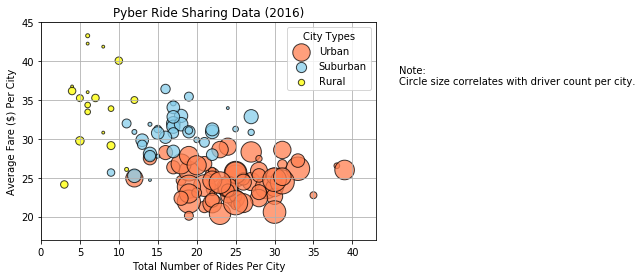

In [108]:
# Obtain the x and y coordinates for each of the three city types
mergedtable_urban = mergedtable.loc[mergedtable["type"] == "Urban", :]
urban_fares = mergedtable_urban.groupby('city')['fare'].mean()
urban_rides = mergedtable_urban.groupby('city')['city'].count()
urban_drivers=mergedtable_urban.groupby('city')['driver_count'].mean()
plt.scatter(urban_rides, urban_fares, marker="o", facecolors="coral", edgecolors="black",
            s=urban_drivers*8, alpha=0.75)
# Obtain the x and y coordinates for each of the three city types
mergedtable= pd.merge(ride_data_df, city_data_df, on="city", how="left")
mergedtable_suburban= mergedtable.loc[mergedtable["type"] == "Suburban", :]
suburban_fares = mergedtable_suburban.groupby('city')['fare'].mean()
suburban_rides = mergedtable_suburban.groupby('city')['city'].count()
suburban_drivers=mergedtable_suburban.groupby('city')['driver_count'].mean()
plt.scatter(suburban_rides, suburban_fares, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburban_drivers*8, alpha=0.75)
mergedtable= pd.merge(ride_data_df, city_data_df, on="city", how="left")
mergedtable_rural= mergedtable.loc[mergedtable["type"] == "Rural", :]
rural_fares = mergedtable_rural.groupby('city')['fare'].mean()
rural_rides = mergedtable_rural.groupby('city')['city'].count()
rural_drivers=mergedtable_rural.groupby('city')['driver_count'].mean()
plt.scatter(rural_rides, rural_fares, marker="o", facecolors="yellow", edgecolors="black",
            s=rural_drivers*8, alpha=0.75)

plt.ylim(17, 45)
plt.xlim(0,43)
plt.grid(axis='both')
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($) Per City")
plt.xlabel("Total Number of Rides Per City")
colors = {"Urban":"lightcoral", "Suburban":"lightskyblue", "Rural":"gold"}
city_labels = ["Urban", "Suburban", "Rural"]
legend_color = ["lightcoral", "lightskyblue", "gold"]
plt.legend(city_labels, title="City Types", markerscale=1, scatterpoints=1)
plt.text(46, 37, "Note: \n" "Circle size correlates with driver count per city.")
plt.show()

# 

In [10]:

# Save Figure
plt.savefig("PyberRideshare.png")

<Figure size 432x288 with 0 Axes>

In [11]:
# Show plot


## Total Fares by City Type

In [105]:
mergedtable= pd.merge(ride_data_df, city_data_df, on="city", how="left")
total_fares = mergedtable.groupby(["type"]).sum()
grand_total=total_fares["fare"][0]+total_fares["fare"][1]+total_fares["fare"][2]
Urban=total_fares["fare"]["Urban"]/grand_total
Suburban=total_fares["fare"]["Suburban"]/grand_total
Rural=total_fares["fare"]["Rural"]/grand_total

In [106]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
sizes = [Urban, Rural,Suburban]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

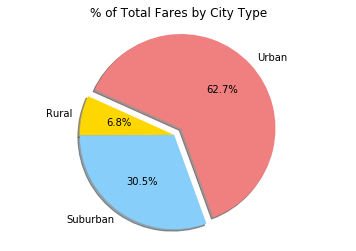

In [72]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)
plt.title('% of Total Fares by City Type')
plt.axis("equal")
# Save Figure
plt.savefig("piechart_fares.png")
plt.show()

## Total Rides by City Type

In [101]:
mergedtable= pd.merge(ride_data_df, city_data_df, on="city", how="left")
total_rides = mergedtable.groupby(["type"]).count()
grand_total_rides=total_rides["ride_id"][0]+total_rides["ride_id"][1]+total_rides["ride_id"][2]
urban_rides=total_rides["ride_id"]["Urban"]/grand_total_rides
suburban_rides=total_rides["ride_id"]["Suburban"]/grand_total_rides
rural_rides=total_rides["ride_id"]["Rural"]/grand_total_rides

In [102]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural","Suburban"]

# The values of each section of the pie chart
sizes = [urban_rides, rural_rides,suburban_rides]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

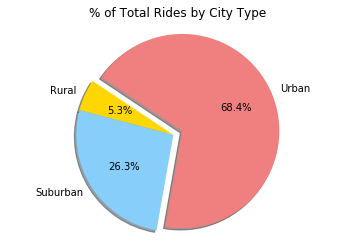

In [103]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title('% of Total Rides by City Type')
plt.axis("equal")
# Save Figure
plt.savefig("piechart_rides.png")
plt.show()

## Total Drivers by City Type

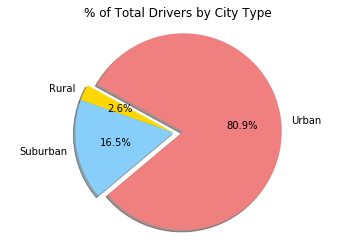

In [104]:
# Calculate Driver Percents
urban_drivers_total =urban_drivers.sum()
suburban_drivers_total=suburban_drivers.sum()
rural_drivers_total=rural_drivers.sum()
grand_total_drivers = urban_drivers_total+suburban_drivers_total+rural_drivers_total
urban_drivers_percent=urban_drivers_total/grand_total_drivers
suburban_drivers_percent=suburban_drivers_total/grand_total_drivers
rural_drivers_percent=rural_drivers_total/grand_total_drivers

# Labels for the sections of our pie chart
labels = ["Urban","Rural", "Suburban",]

# The values of each section of the pie chart
sizes = [urban_drivers_percent,rural_drivers_percent, suburban_drivers_percent]

# The colors of each section of the pie chart
colors = ["lightcoral","gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
# Build Pie Charts
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")
# Save Figure
plt.savefig("piechart_drivers.png")
# Show Figure
plt.show()
